In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = sm.datasets.co2.load_pandas()
type(data)

statsmodels.datasets.utils.Dataset

In [3]:
co2 = data.data
co2.shape

(2284, 1)

In [4]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [5]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [6]:
y = co2.co2.resample('MS').mean()
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [7]:
y['1990':'1991']

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
Freq: MS, Name: co2, dtype: float64

In [8]:
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

In [9]:
y.isnull().sum()

5

In [10]:
y[pd.isnull(y)]

1958-06-01   NaN
1958-10-01   NaN
1964-02-01   NaN
1964-03-01   NaN
1964-04-01   NaN
Name: co2, dtype: float64

In [11]:
y = y.fillna(y.bfill())

In [12]:
y.isnull().sum()

0

In [13]:
y['1958-04-01':'1958-12-01']

1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
Freq: MS, Name: co2, dtype: float64

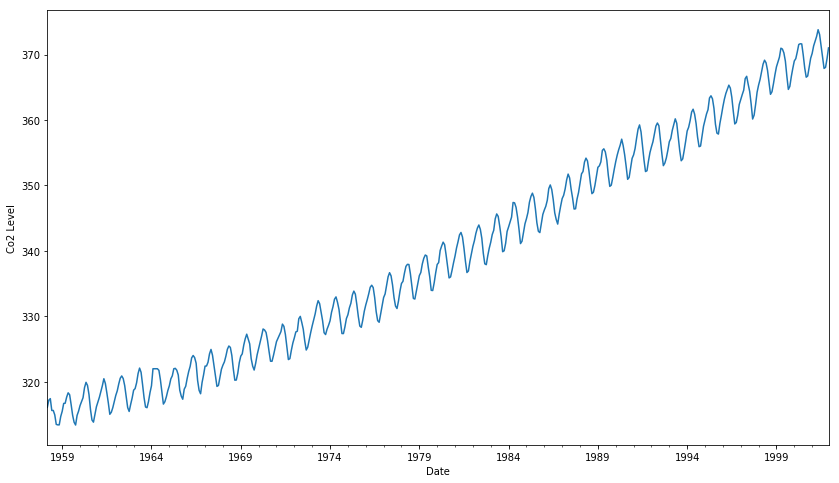

In [14]:
plt.xlabel('Date')
plt.ylabel('Co2 Level')
y.plot(figsize=(14, 8))

In [15]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

C:\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


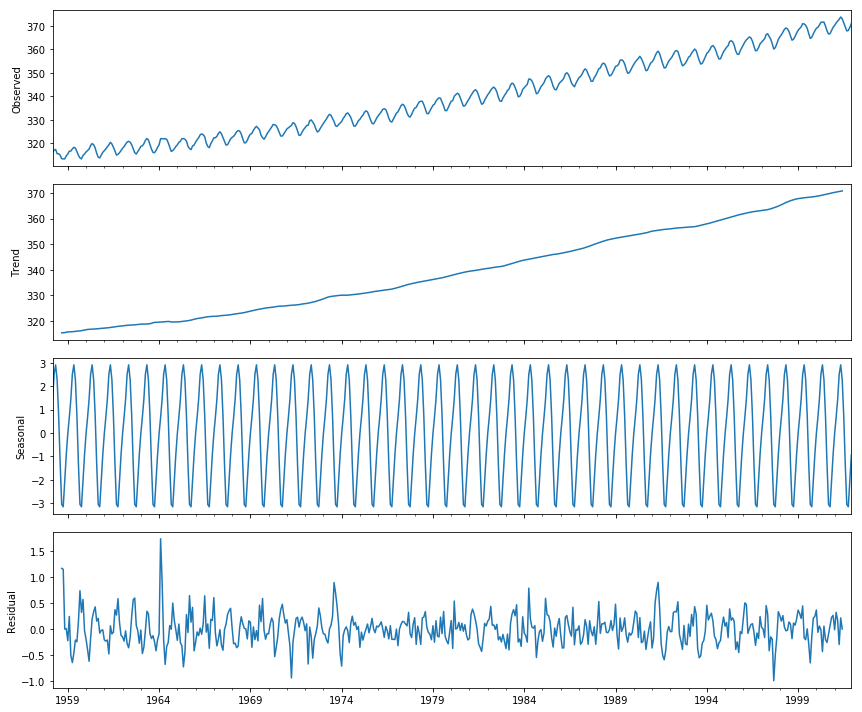

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

fig = decomposition.plot()
#plt.show()

In [19]:
sunspots = sm.datasets.sunspots.load_pandas().data

In [23]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [20]:
sunspots.shape

(309, 2)

In [21]:
sunspots.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [25]:
sunspots.YEAR.describe()

count     309.000000
mean     1854.000000
std        89.344838
min      1700.000000
25%      1777.000000
50%      1854.000000
75%      1931.000000
max      2008.000000
Name: YEAR, dtype: float64

In [28]:
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

In [31]:
del sunspots['YEAR']
sunspots.head()

,SUNACTIVITY
1700-12-31 00:00:00,5.0
1701-12-31 00:00:00,11.0
1702-12-31 00:00:00,16.0
1703-12-31 00:00:00,23.0
1704-12-31 00:00:00,36.0


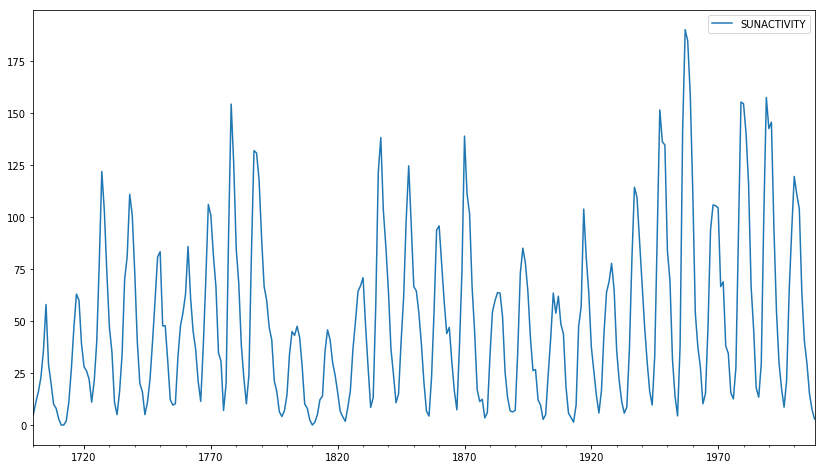

In [33]:
sunspots.plot(figsize=(14, 8))

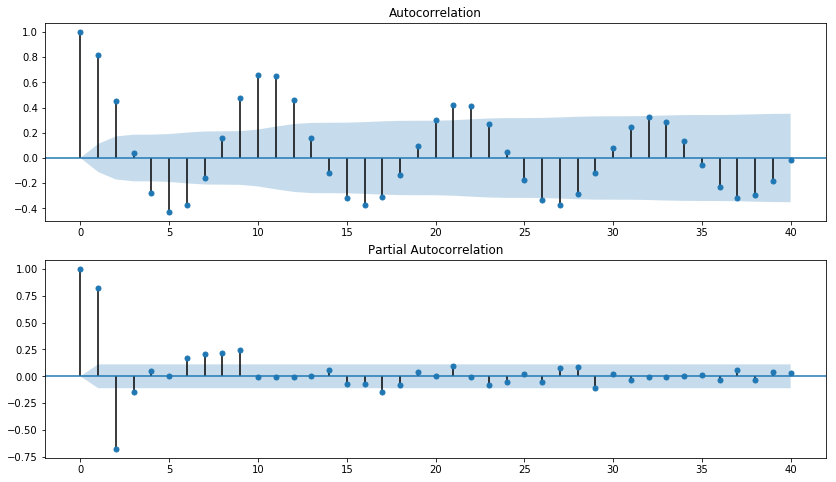

In [34]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sunspots.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sunspots, lags=40, ax=ax2)

In [38]:
arma_mod20 = sm.tsa.ARMA(sunspots, (2,0)).fit(disp=False)
print(arma_mod20.params)

const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [39]:
arma_mod30 = sm.tsa.ARMA(sunspots, (3,0)).fit(disp=False)
print(arma_mod30.params)

const                49.749929
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [40]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

(2622.6363380639814, 2637.5697031715722, 2628.6067259092274)


In [41]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

(2619.403628696475, 2638.070335080964, 2626.8666135030326)


In [42]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564808578936077

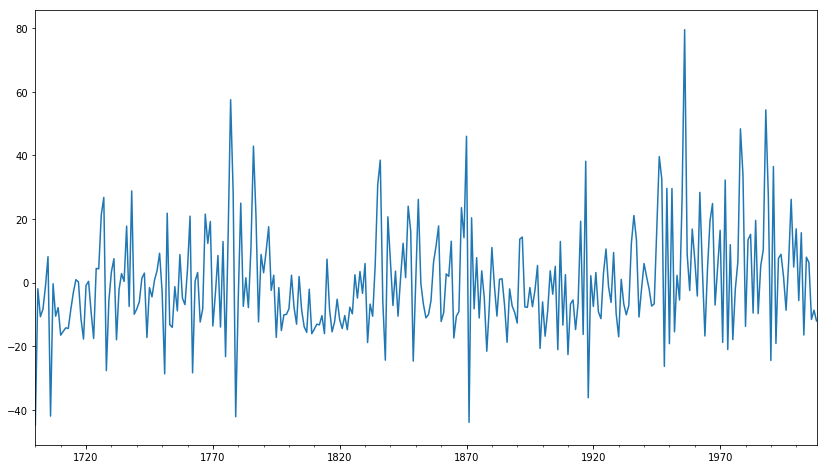

In [43]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [45]:
resid = arma_mod30.resid

from scipy import stats
stats.normaltest(resid)

NormaltestResult(statistic=49.845029668471327, pvalue=1.5006842769168631e-11)

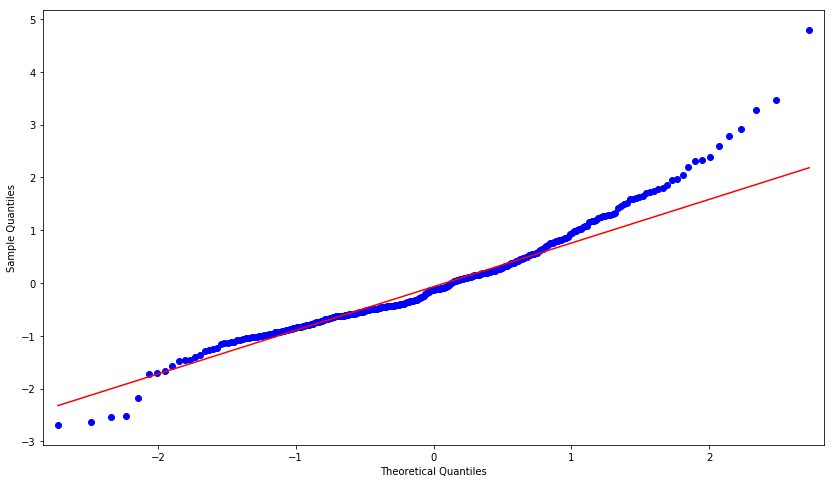

In [47]:
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

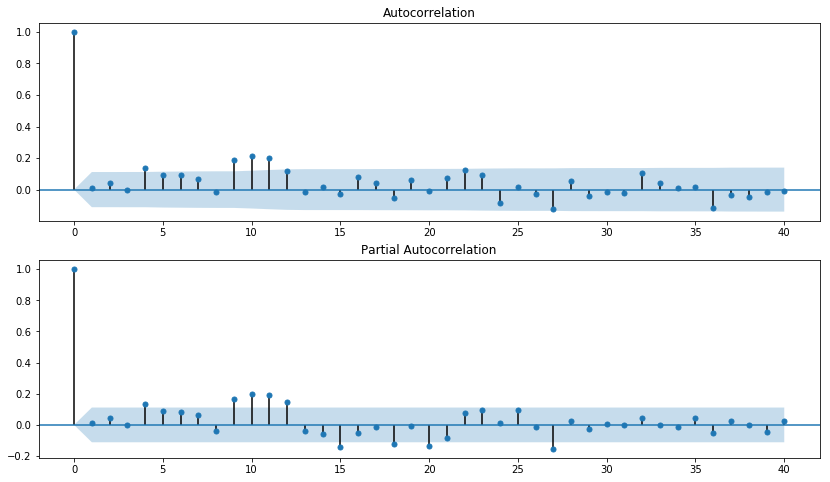

In [48]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [50]:
import numpy as np

r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009179   0.026286  8.712029e-01
2.0   0.041793   0.573040  7.508721e-01
3.0  -0.001335   0.573599  9.024487e-01
4.0   0.136089   6.408911  1.706209e-01
5.0   0.092468   9.111815  1.046865e-01
6.0   0.091948  11.793226  6.674387e-02
7.0   0.068748  13.297181  6.519027e-02
8.0  -0.015020  13.369209  9.976194e-02
9.0   0.187592  24.641888  3.393936e-03
10.0  0.213718  39.321975  2.229492e-05
11.0  0.201082  52.361119  2.344968e-07
12.0  0.117182  56.804169  8.574328e-08
13.0 -0.014055  56.868306  1.893917e-07
14.0  0.015398  56.945544  3.997690e-07
15.0 -0.024967  57.149300  7.741527e-07
16.0  0.080916  59.296749  6.872217e-07
17.0  0.041138  59.853717  1.110952e-06
18.0 -0.052021  60.747408  1.548444e-06
19.0  0.062496  62.041671  1.831657e-06
20.0 -0.010301  62.076958  3.381267e-06
21.0  0.074453  63.926633  3.193609e-06
22.0  0.124955  69.154752  8.978416e-07
23.0  0.093162  72.071016  5.799821e-07


In [51]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047416
1991-12-31    140.993005
1992-12-31     94.859126
1993-12-31     46.860920
1994-12-31     11.242606
1995-12-31     -4.721278
1996-12-31     -1.166911
1997-12-31     16.185676
1998-12-31     39.021854
1999-12-31     59.449836
2000-12-31     72.170109
2001-12-31     75.376759
2002-12-31     70.436446
2003-12-31     60.731586
2004-12-31     50.201804
2005-12-31     42.076036
2006-12-31     38.114292
2007-12-31     38.454641
2008-12-31     41.963804
2009-12-31     46.869268
2010-12-31     51.423238
2011-12-31     54.399696
2012-12-31     55.321672
Freq: A-DEC, dtype: float64


C:\Anaconda2\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


C:\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


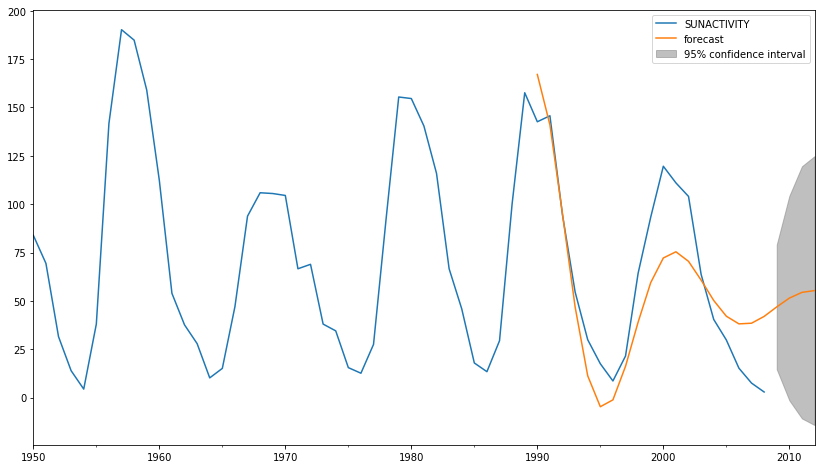

In [53]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sunspots.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

In [54]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

mean_forecast_err(sunspots.SUNACTIVITY, predict_sunspots)

5.636961675275295